In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [2]:
url = 'https://raw.githubusercontent.com/rusita-ai/pyData/master/Seoul_Temp.csv'
temp = pd.read_csv(url)

temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    3287 non-null   object 
 1   avg     3287 non-null   float64
 2   min     3287 non-null   float64
 3   max     3287 non-null   float64
dtypes: float64(3), object(1)
memory usage: 102.8+ KB


In [3]:
temp.head()

,date,avg,min,max
0,2011-01-01,-6.8,-10.4,-2.9
1,2011-01-02,-5.4,-8.5,-1.2
2,2011-01-03,-4.5,-8.5,-0.3
3,2011-01-04,-3.9,-7.4,-1.7
4,2011-01-05,-4.0,-7.7,-1.8


In [ ]:
361+361

722

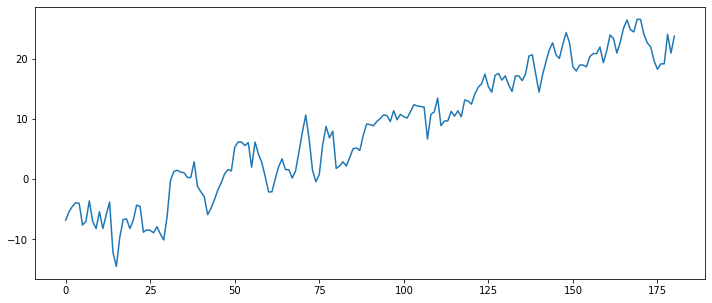

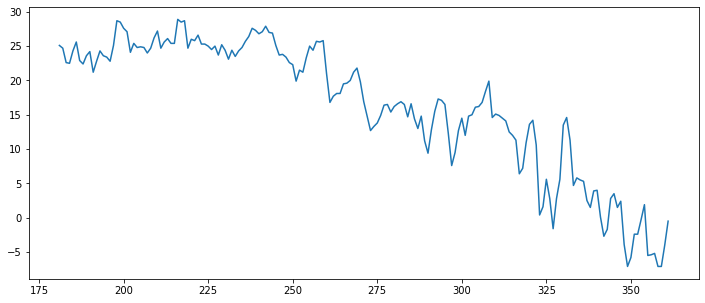

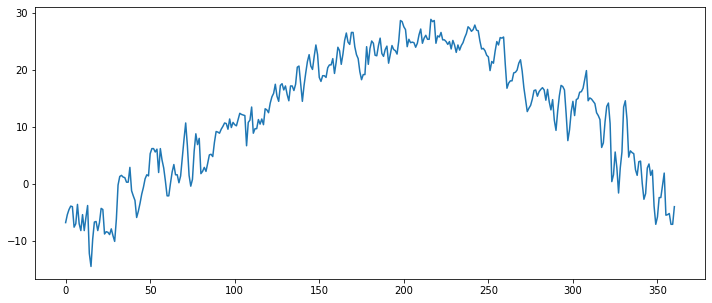

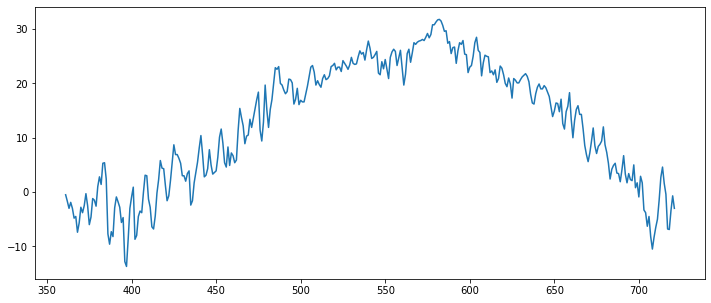

In [4]:
temp_data = temp[['avg']]

plt.figure(figsize=(12,5))
plt.plot(temp_data[:181])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[181:362])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[:361])
plt.show()
plt.figure(figsize=(12,5))
plt.plot(temp_data[361:722])
plt.show()

In [5]:
scaler = MinMaxScaler(feature_range=(-1,1))

temp_data = scaler.fit_transform(temp_data)

In [6]:
train = temp_data[:2557]
test = temp_data[2557:]

print(2557/180, 730/180)  # 7:2

14.205555555555556 4.055555555555555


In [7]:
np.array(train).shape, np.array(test).shape

((2557, 1), (730, 1))

In [8]:
train[:5]

array([[-0.67010309],
       [-0.61237113],
       [-0.57525773],
       [-0.55051546],
       [-0.55463918]])

In [16]:
def create_dataset(data, look_back):
  X, y =[],[]

  for i in range(len(data) - look_back):
    X.append(data[i:(i+look_back)])
    y.append(data[i+look_back])

  return np.array(X), np.array(y)

In [17]:
look_back = 180 #일을 반복 주기로look_back = 180일을 반복 주기로

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

train_X, train_y = create_dataset(train, look_back)
test_X, test_y = create_dataset(test, look_back)

train_X.shape, train_y.shape, test_X.shape, test_y.shape

((2377, 180, 1), (2377, 1), (550, 180, 1), (550, 1))